# Data importing and exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

Import terrorist dataset.

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

C:\Users\Hi There!\AppData\Local\Temp\ipykernel_3444\1691415715.py:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


In [3]:
df.head() 

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,Na

In [4]:
# Check for duplicates
df.duplicated().sum()

0

Luckily we don't have any duplicated values.

We have a lot of features to work with. For simplification and the nature of the assignment, I'll use a subset of the whole data frame.

In [5]:
df1 = df[["iyear","imonth","iday","country_txt","region_txt","city","latitude","longitude","weaptype1_txt",
         "success","suicide","attacktype1_txt","targtype1_txt","targsubtype1_txt","target1","natlty1_txt",
        "gname","gsubname","nperps","weaptype1_txt","weapsubtype1_txt","nkill","nkillus"]]

In [6]:
# Data summary
df1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   city              181257 non-null  object 
 6   latitude          177135 non-null  float64
 7   longitude         177134 non-null  float64
 8   weaptype1_txt     181691 non-null  object 
 9   success           181691 non-null  int64  
 10  suicide           181691 non-null  int64  
 11  attacktype1_txt   181691 non-null  object 
 12  targtype1_txt     181691 non-null  object 
 13  targsubtype1_txt  171318 non-null  object 
 14  target1           181055 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  gname             18

In [7]:
df1.describe(include = "all")

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,weaptype1_txt,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
count,181691.000000,181691.000000,181691.000000,181691,181691,181257,177135.000000,1.771340e+05,181691,181691.000000,181691.000000,181691,181691,171318,181055,180132,181691,5890,110576.000000,181691,160923,171378.000000,117245.000000
unique,NaN,NaN,NaN,205,12,36674,NaN,NaN,12,NaN,NaN,9,22,112,86006,215,3537,1183,NaN,12,30,NaN,NaN
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Explosives,NaN,NaN,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Iraq,Unknown,Militants,NaN,Explosives,Unknown Explosive Type,NaN,NaN
freq,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,92426,NaN,NaN,88255,43511,11596,6461,24113,82782,480,NaN,92426,44980,NaN,NaN
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,0.889598,0.036507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.361154,NaN,NaN,2.403272,0.045981
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,0.313391,0.187549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.536633,NaN,NaN,11.545741,5.681854
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000


The data comprises of terrorists incidents from 1970 to 2017. However, there are some anomalies lying in the dataset.
- Some month and day are 0.
- Number of perpetrators from several incidents is negative.

Let's see why these anomalies exist.

In [8]:
# Check data where month and day are 0
df1[(df1["imonth"] == 0) | (df1["iday"] == 0)].head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,weaptype1_txt,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Unknown,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,7.0,Unknown,NaN,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Unknown,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,NaN,NaN,Unknown,NaN,1.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Explosives,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Incendiary,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN
96,1970,3,0,Philippines,Southeast Asia,Manila,14.596051,120.978666,Explosives,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,NaN,NaN,Explosives,Unknown Explosive Type,0.0,NaN


It's hard to handle datetime data with day and month being 0. Also, I can't seem to find out the reason they are 0. So I'll proceed to remove those anomalies.

In [9]:
# Remove anomalies of imonth and iday features
df1 = df1[(df1["imonth"] != 0) & (df1["iday"] != 0)]

I'll concatinate year, month and day into a single column and change it to datetime datatype for further analysis.

In [10]:
# Group into date feature and change into datetime datatype
df1["date"] = df1["iyear"].astype(str) + "-" + df1["imonth"].astype(str) + "-" + df1["iday"].astype(str)
df1["date"] = pd.to_datetime(df1["date"])
df1["date"]

0        1970-07-02
5        1970-01-01
6        1970-01-02
7        1970-01-02
8        1970-01-02
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: date, Length: 180800, dtype: datetime64[ns]

In [11]:
# Check data where nperps is negative
df1[df1["nperps"] < 0].head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,weaptype1_txt,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,gsubname,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,date
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Firearms,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Headquarters,United States,Black Nationalists,NaN,-99.0,Firearms,Unknown Gun Type,0.0,0.0,1970-01-01
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Explosives,1,0,Bombing/Explosion,Utilities,Electricity,Edes Substation,United States,Unknown,NaN,-99.0,Explosives,Unknown Explosive Type,0.0,0.0,1970-01-02
11,1970,1,6,United States,North America,Denver,39.758968,-104.876305,Incendiary,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,"Army Recruiting Station, Denver Colorado",United States,Left-Wing Militants,NaN,-99.0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,1970-01-06
13,1970,1,9,United States,North America,Detroit,42.331685,-83.047924,Incendiary,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Packard Properties building of Detroit Michigan,United States,Left-Wing Militants,NaN,-99.0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,1970-01-09
14,1970,1,9,United States,North America,Rio Piedras,18.386932,-66.061127,Incendiary,1,0,Facility/Infrastructure Attack,Business,Retail/Grocery/Bakery,Baker's Store,United States,Armed Commandos of Liberation,NaN,-99.0,Incendiary,Arson/Fire,0.0,0.0,1970-01-09


We have 82000 instances where nperps is negative, specifically -99. This can not be a mistake. But unfortunately I don't know why either.

In [12]:
# Drop the whole nperps column
df1 = df1.drop(columns = "nperps")

# Data visualization and validation

There are several questions that need to be answered:
- How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?
- Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?
- What are the most common methods of attacks? Does it differ in various regions or in time?
- Plot the locations of attacks on a map to visualize their regional spread.

We'll go through the questions 1 by 1.

### Q1. How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

In order to best capture the change of terrorist acts over a course of time, we can use a line graph.

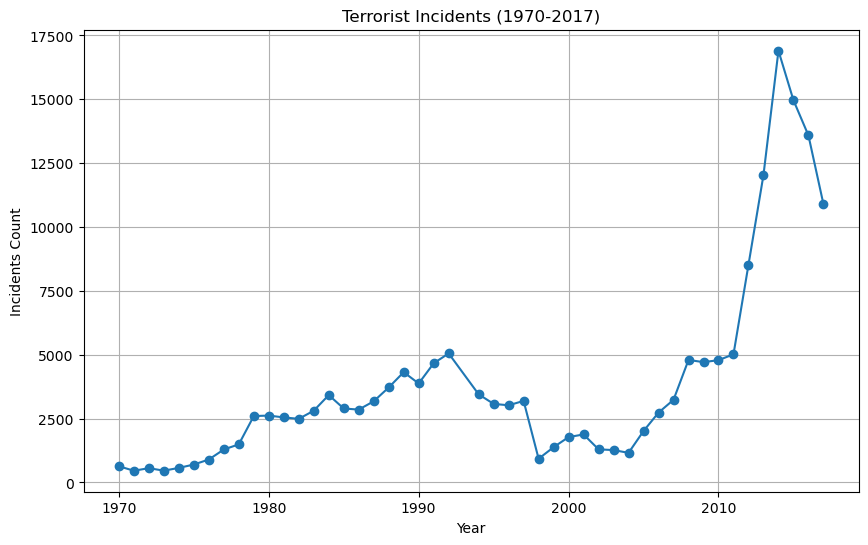

In [13]:
yearly_incidents = df1["iyear"].value_counts().sort_index()

plt.figure(figsize=(10, 6))  
plt.plot(yearly_incidents.index, yearly_incidents.values, marker='o', linestyle='-')
plt.title('Terrorist Incidents (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Incidents Count')
plt.grid(True)
plt.show()

The number of terrorist incidents are relatively low from 1970 to 1976. After that, it increases gradually and reaches its high point of around 5000 incidents in 1992. Then it displays a downward trend until 2004. From 2005 onwards, the level of terrorist activities intensity skyrocketed exponentially, up to about 17000 incidents in 2014. The number of terrorist incidents does decrease after 2014, but it still remains quite high.

Next, let's see how different this trend is between the regions in the world.

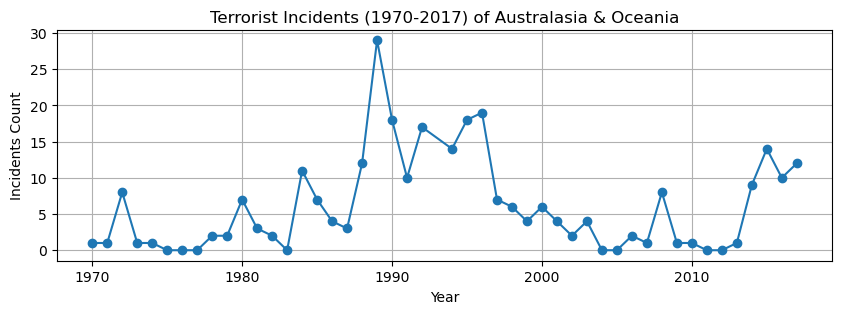

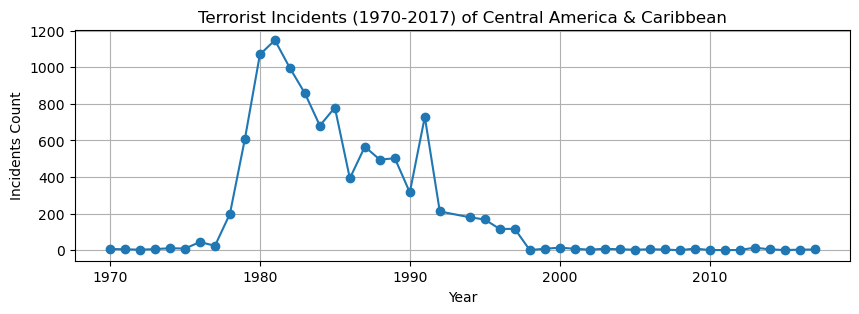

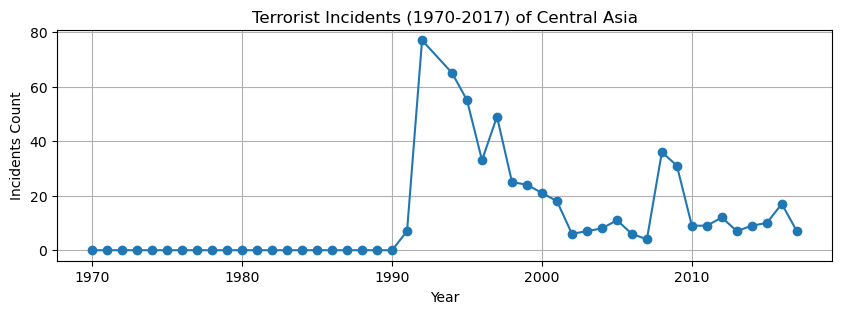

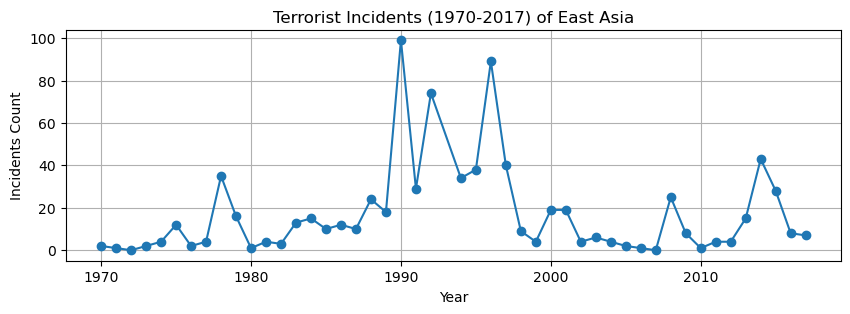

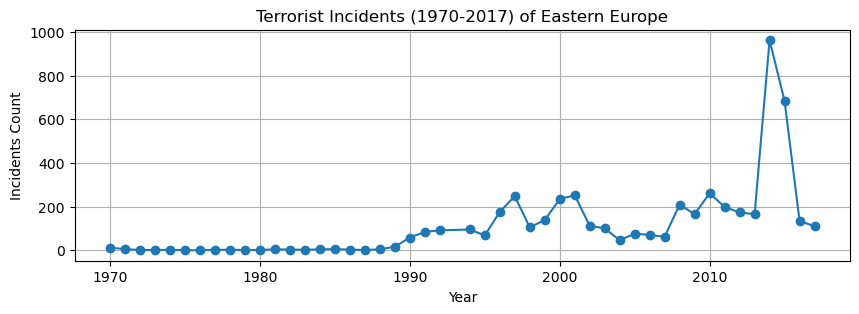

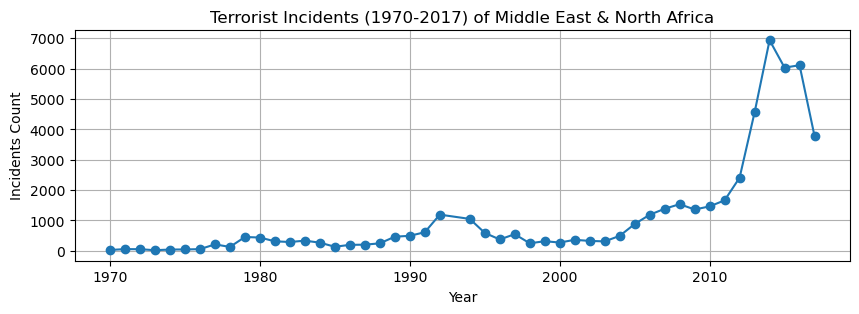

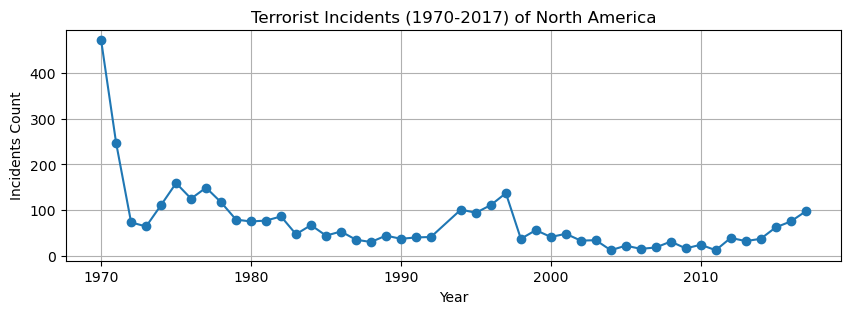

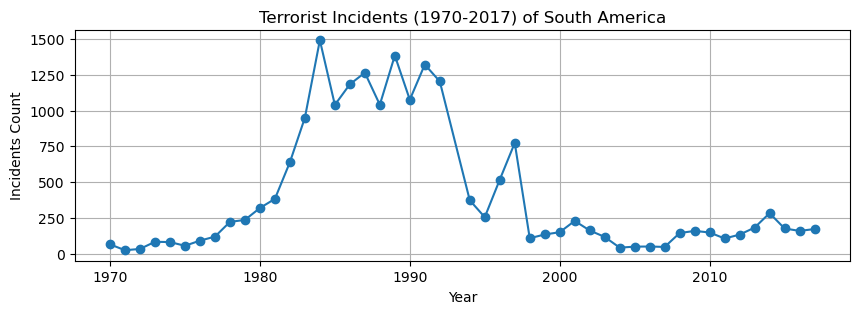

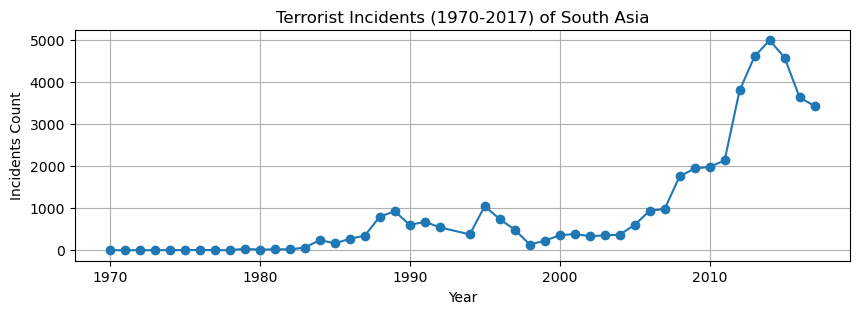

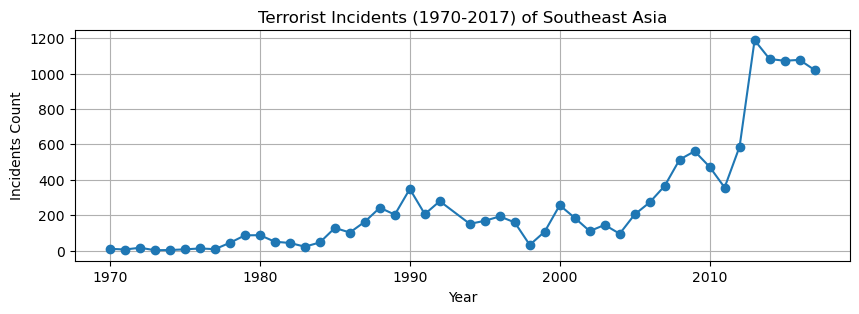

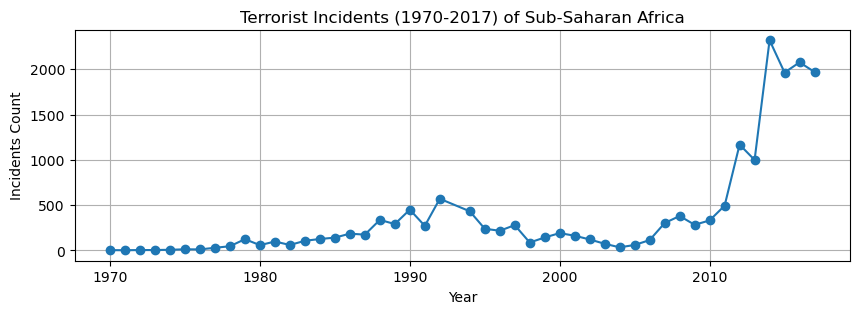

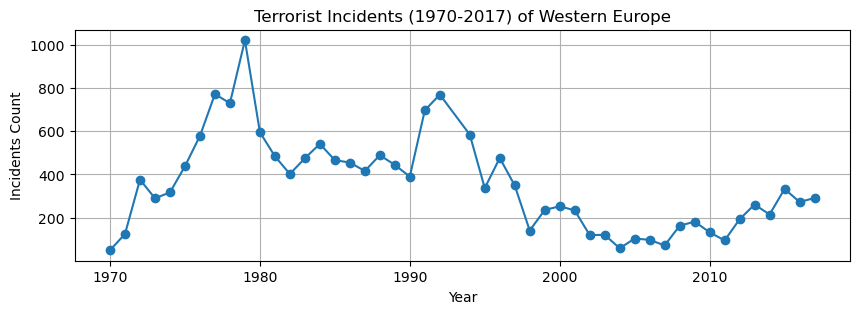

In [14]:
yearly_region_counts = df.groupby(['iyear', 'region_txt']).size().unstack(fill_value=0)

for x in yearly_region_counts:
    plt.figure(figsize=(10, 3))  
    plt.plot(yearly_incidents.index, yearly_region_counts[x], marker='o', linestyle='-')
    plt.title(f'Terrorist Incidents (1970-2017) of {x}')
    plt.xlabel('Year')
    plt.ylabel('Incidents Count')
    plt.grid(True)
    plt.show()

Data shows that of all regions in the world, Autralia & Oceania, Central Asia and East Asia are least affected by terrorist acts. Terrorists incidents mostly occur in Middle East & North Africa, South Asia and Sub-Saharan Africa.

The 3 most affected by terrorist regions mentioned above, along with Eastern Europe and Southeast Asia, are all following the world trend with an exponential surge in number of terrorist acts from 2010 onwards. Other regions, on the other hand, do not follow the world trend.

### 2. Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

To answer this question, a scatter plot would be a good method. I'll group the data by year and see how it goes.

In [15]:
# Aggregate number of incidents and casualties by year
group = df1.groupby("iyear").agg(n_incidents = ("iyear", "count"), n_casualties = ("nkill", "sum")).reset_index()
group.head()

,iyear,n_incidents,n_casualties
0,1970,636,171.0
1,1971,461,168.0
2,1972,561,566.0
3,1973,463,370.0
4,1974,572,538.0


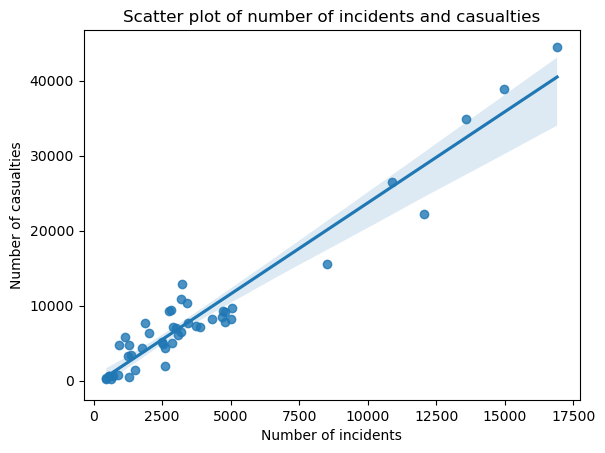

In [16]:
# Plot a scatter plot 
sns.regplot(data = group, x = "n_incidents", y = "n_casualties")
plt.xlabel("Number of incidents")
plt.ylabel("Number of casualties")
plt.title("Scatter plot of number of incidents and casualties")
plt.show()

In [17]:
# Calculate correlation value
group.corr()

,iyear,n_incidents,n_casualties
iyear,1.000000,0.664625,0.688671
n_incidents,0.664625,1.000000,0.966331
n_casualties,0.688671,0.966331,1.000000


The 2 features are almost perfectly correlated with a correlation value of 0.966331. 

Let's find the equation for the 2 variables.

In [18]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Create subsets of data
x = group[["n_incidents"]]
y = group["n_casualties"]

# Fit the model
lr.fit(x, y)

# Get the slope and intercept 
slope = lr.coef_[0]
intercept = lr.intercept_

# Print the equation
print(f"Linear Equation: n_casualties = {slope:.2f} x n_incidents + {intercept:.2f}")


Linear Equation: n_casualties = 2.43 x n_incidents + -615.17


In [19]:
# Create expected column
group["expected"] = lr.predict(x)

# Create error and absolute error column
group["error"] = group["n_casualties"] - group["expected"] 
group["abs_error"] = abs(group["n_casualties"] - group["expected"])

# Sort our data by absolute error
group.sort_values("abs_error", ascending = False).head(5)

,iyear,n_incidents,n_casualties,expected,error,abs_error
42,2013,12036,22273.0,28647.349947,-6374.349947,6374.349947
36,2007,3237,12810.0,7254.786398,5555.213602,5555.213602
41,2012,8522,15497.0,20103.939524,-4606.939524,4606.939524
43,2014,16903,44490.0,40480.240820,4009.759180,4009.759180
9,1979,2601,1996.0,5708.511774,-3712.511774,3712.511774


The 5 data points above are the years where the number of casualties greatly deter from their expected values. We can see that in the year 2013, there are only about 22273 terrorist casualties. However, with 12036 incidents of terrorist attacks, we are expected to see about 28647 casualties, hence the error of -6374. 

These 5 years have the largest error. In certain context, they may be considered anomalies or outliers. 

### 3. What are the most common methods of attacks? Does it differ in various regions or in time?

In [20]:
# Calculate value counts
value_counts = df1['attacktype1_txt'].value_counts()

# Calculate the percentage of total
percentage_of_total = (value_counts / len(df1)) * 100

# Create a DataFrame to display both count and percentage
result_df = pd.DataFrame({'Count': value_counts, 'Percentage of Total': percentage_of_total})
print(result_df)

                                     Count  Percentage of Total
Bombing/Explosion                    87931            48.634403
Armed Assault                        42548            23.533186
Assassination                        19191            10.614491
Hostage Taking (Kidnapping)          11015             6.092367
Facility/Infrastructure Attack       10275             5.683075
Unknown                               7193             3.978429
Unarmed Assault                       1007             0.556969
Hostage Taking (Barricade Incident)    985             0.544801
Hijacking                              655             0.362279


The most common method of terrorist acts is bombing/explosion with nearly 88000 incidents, accounting for 48.63% total number of terrorist attacks.

Let's see if there is any difference in the most common method of attacks between different regions and time frames.

In [21]:
# Group by "region_txt" and "attacktype1_txt" and calculate the count
group1 = df1.groupby(["region_txt","attacktype1_txt"]).agg(count = ("attacktype1_txt", "count")).reset_index()

# Find the index with the maximum count for each region
idx = group1.groupby("region_txt")["count"].idxmax()

# Extract the corresponding attack type for each region with the highest count
result_df = group1.loc[idx]
result_df

,region_txt,attacktype1_txt,count
2,Australasia & Oceania,Bombing/Explosion,72
9,Central America & Caribbean,Armed Assault,4357
20,Central Asia,Bombing/Explosion,235
29,East Asia,Bombing/Explosion,323
38,Eastern Europe,Bombing/Explosion,2763
47,Middle East & North Africa,Bombing/Explosion,30847
56,North America,Bombing/Explosion,1520
65,South America,Bombing/Explosion,9011
74,South Asia,Bombing/Explosion,21206
83,Southeast Asia,Bombing/Explosion,4804


The result is quite interesting. The most common methods of terrorist attacks in most regions are bombings and explosions, except for Central America & Caribbean and Sub-Saharan Africa. This could be due to the ease of access to firearms in Central America and the lack of firearm-restricting laws in Sub-Saharan Africa.

How about the difference of most common terrorist attack method over time.

In [22]:
# Group by "iyear" and "attacktype1_txt" and calculate the count
group2 = df1.groupby(["iyear","attacktype1_txt"]).agg(count = ("attacktype1_txt", "count")).reset_index()

# Find the index with the maximum count for each year
idx = group2.groupby("iyear")["count"].idxmax()

# Extract the corresponding attack type for each region with the highest count
result_df = group2.loc[idx]
result_df

,iyear,attacktype1_txt,count
2,1970,Bombing/Explosion,329
11,1971,Bombing/Explosion,234
18,1972,Assassination,265
26,1973,Assassination,164
36,1974,Bombing/Explosion,278
45,1975,Bombing/Explosion,353
53,1976,Bombing/Explosion,409
62,1977,Bombing/Explosion,621
70,1978,Bombing/Explosion,637
78,1979,Bombing/Explosion,1048


In 1972 and 1973, the most common method is actually assassination. All the other years still have bombing/explosion as the most common terrorist method of attack.

### 4. Plot the locations of attacks on a map to visualize their regional spread

I'll use Tableau to handle this question.

In [23]:
# Export the cleaned data frame
df1.to_csv("terrorist_df.csv", index = False)

![SNOWFALL](Attack_spread.png)

The above graph shows the distribution of terrorist attack on a global scale. Each dot represents a coordinates pair (a location). The size and color of a dot shows the number of attacks occur at that location.

From the graph, it's clear that South Asia, Middle East, Sub-Saharan and South America are targeted by terrorists the most. An astounding 7513 acts of terrorism occured in a single spot in Iraq, implying the unstability of this country and this whole region. Meanwhile, Canada, Russia, China, Viet Nam and Australia are mostly void of terrorism. This could be due to a lot of factors, however we can be sure that these countries' governments have done a really good job on protecting its citizens.

For further information regarding distribution of attacks of different regions, please visit my visualization: https://public.tableau.com/app/profile/nguy.n.tr.cao.s.n/viz/Distributionofterroristattacks/Sheet1?publish=yes

# Additional content

Let's go outside the scope of the assignment's questions.

### 5. What is the success rate of the terrorist attacks? How does it differ between different regions and time?

In [24]:
# Calculate number of successful attacks
success_yes = df1.groupby("region_txt").agg(success_rate = ("success", "sum"))

# Calculate total number of attacks
value_counts = df1.groupby("region_txt").agg(success_rate = ("success", "count"))

# Calculate success rate

success_rate = success_yes / value_counts * 100
success_rate.sort_values("success_rate")

,success_rate
region_txt,
North America,83.694379
East Asia,84.810127
Western Europe,85.051672
Australasia & Oceania,85.198556
Eastern Europe,86.292835
South Asia,87.518388
Middle East & North Africa,87.807302
Southeast Asia,89.298923
Central Asia,89.857651


The first thing we can see is the abnormally high success rate of terrorist acts. The success rate of terrorism in different regions ranges from 83.69% to 96.49%. If a terrorist attack occurred in Central America & Caribbean, it would most probably be successful. This is extremely concerning.

North America and East Asia are performing well on tackling the attacks. Especially East Asia with both low number of terrorist incidents and low success rate.

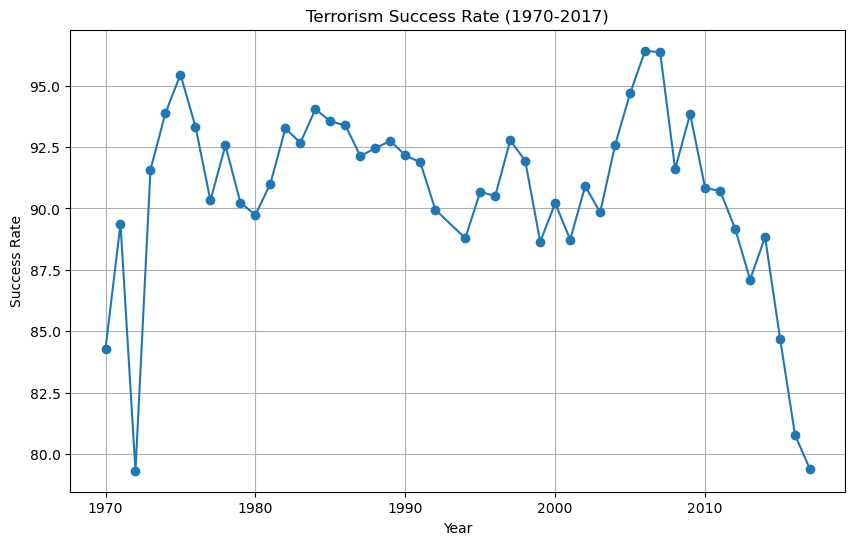

In [25]:
# Calculate number of successful attacks
success_yes = df1.groupby("iyear").agg(success_rate = ("success", "sum"))

# Calculate total number of attacks
value_counts = df1.groupby("iyear").agg(success_rate = ("success", "count"))

# Calculate success rate
success_rate = (success_yes / value_counts * 100).reset_index()

# Visualize
plt.figure(figsize=(10, 6))  
plt.plot(success_rate["iyear"], success_rate["success_rate"], marker='o', linestyle='-')
plt.title('Terrorism Success Rate (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

This graph introduces a new perspective on the whole situation of terrorism acts. We already know that the number of attacks increases exponentially from 2010 onwards. However, the success rates of those incidents plummeted from over 95% to just nearly 80% for just a span of 10 years from 2007 to 2017. Although there are more terrorist attacks in the recent years, they are dealt with more efficiently than in the past. This is good news, however a success rate of 80% is still too high. Combined with high number of attacks, we are still left with a lot of successful attacks around the world.

### 6. What is the suicide rate of the terrorist attacks? How does it differ between different regions and time?

Repeat the same process with suicide.

In [26]:
# Calculate number of suicidal attacks
suicide_yes = df1.groupby("region_txt").agg(suicide_rate = ("suicide", "sum"))

# Calculate total number of attacks
value_counts = df1.groupby("region_txt").agg(suicide_rate = ("suicide", "count"))

# Calculate suicide rate (by region)
suicide_rate = (suicide_yes / value_counts * 100).reset_index()
suicide_rate

,region_txt,suicide_rate
0,Australasia & Oceania,0.361011
1,Central America & Caribbean,0.009747
2,Central Asia,1.957295
3,East Asia,2.151899
4,Eastern Europe,1.791277
5,Middle East & North Africa,7.492498
6,North America,0.468384
7,South America,0.031851
8,South Asia,4.290554
9,Southeast Asia,0.225117


Suicidal terrorist attacks mostly occur in Middle East & North Africa, South Asia and Sub-Saharan Africa. This could be the result of religional extremists. The political nature of these regions being quite complicated, combined with a high rate of suicidal attacks, is proposing a huge threat for the native citizens. 

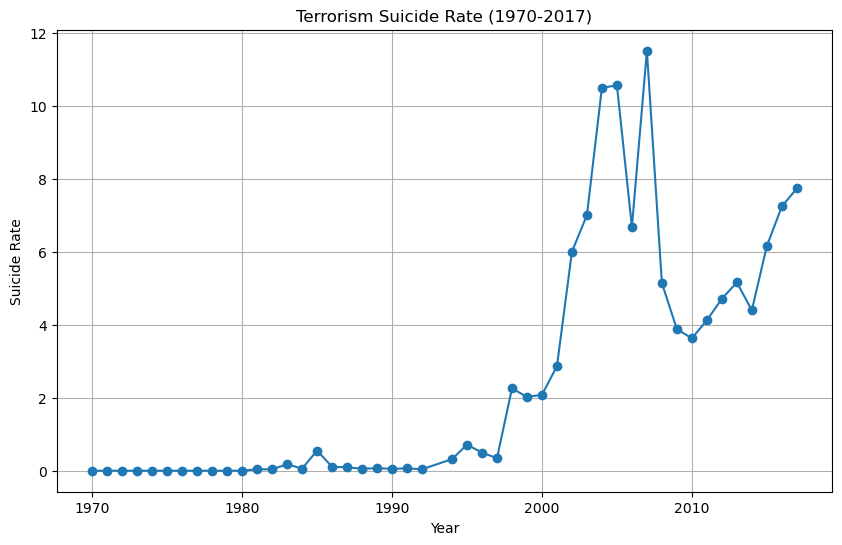

In [27]:
# Calculate number of suicidal attacks
suicide_yes = df1.groupby("iyear").agg(suicide_rate = ("suicide", "sum"))

# Calculate total number of attacks
value_counts = df1.groupby("iyear").agg(suicide_rate = ("suicide", "count"))

# Calculate suicide rate (by year)
suicide_rate = (suicide_yes / value_counts * 100).reset_index()

# Visualize
plt.figure(figsize=(10, 6))  
plt.plot(suicide_rate["iyear"], suicide_rate["suicide_rate"], marker='o', linestyle='-')
plt.title('Terrorism Suicide Rate (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.grid(True)
plt.show()

This graph demonstrates a detrimental fact that the rate of suicidal terrorist attacks increases over time. The suicide rate is also correlated with the number of attacks in general. In other words, not only does the number of attacks skyrocket from 2010 onwards, the suicide rate is also increases by a substantial amount, meaning that we now have more suicidal attacks than ever before. 

There are a few years between 2001 and 2007 with exceptionally high suicide rate. This can be linked to the catastrophic 9/11 event in America where terrorists saw how effective the suicide method was. 

### 7. What is the target type that gets attacked the most? Is it the same for different regions and timeframes?

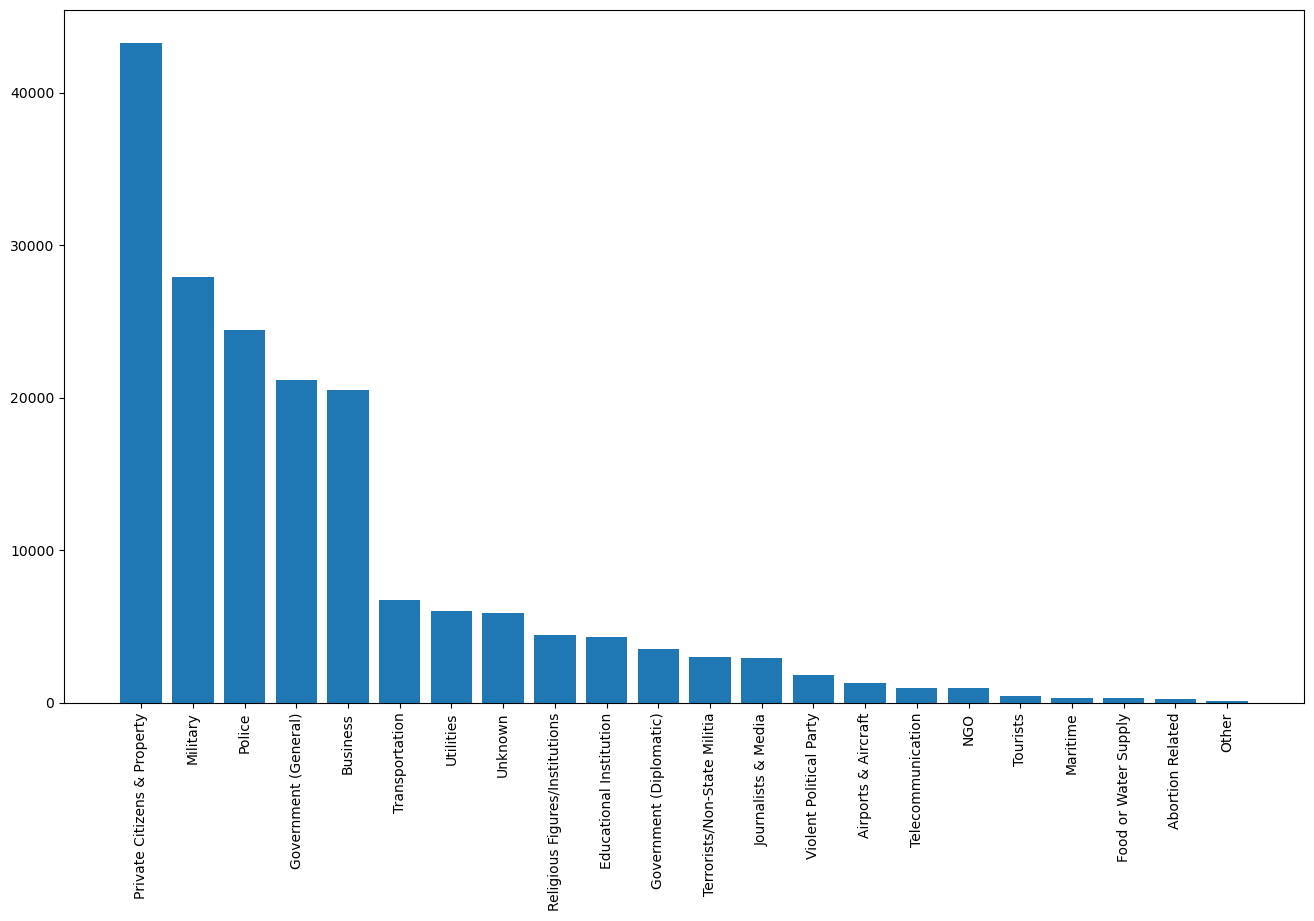

In [28]:
# Check the most targeted thing globally
global_target = df1["targtype1_txt"].value_counts()

#Visualize
plt.figure(figsize = (16,9))
plt.bar(global_target.index, global_target.values)
plt.xticks(rotation = 90)
plt.show()

On the global scale, private properties, military, police, government (general) and business are the top 5 most targeted locations for terrorist attacks. This is contrary to my prior belief. What would the terrorists gain if they were to attack innocent citizens instead of government officials? After some thoughts, I can think of several reasons:
- Private properties and citizens are not as strongly protected as government buildings or officials, hence they become an easier target.
- Targeting an easy prey like citizens can cause socioeconomic instability and destroy people's faith in the government.

So how does this differ between regions?

In [29]:
# Count the number of times a target is chosen
df_target = df1.groupby(["region_txt","targtype1_txt"]).agg(count = ("targtype1_txt", "count")).reset_index()

# Find the index of the most targeted place
max_index = df_target.groupby("region_txt")["count"].idxmax()

# Find the most targeted places by region
df_region_target = df_target.loc[max_index]
df_region_target

,region_txt,targtype1_txt,count
5,Australasia & Oceania,Government (General),52
27,Central America & Caribbean,Military,3055
45,Central Asia,Government (General),126
75,East Asia,Transportation,148
86,Eastern Europe,Military,1136
111,Middle East & North Africa,Private Citizens & Property,15218
122,North America,Business,892
144,South America,Business,3461
176,South Asia,Private Citizens & Property,10431
197,Southeast Asia,Private Citizens & Property,2485


There are several regions where terrorists's most common target is not Private Citizens & Property, such as Western Europe North and South America, etc. 

How about over time?

In [30]:
# Count the number of times a target is chosen
df_target = df1.groupby(["iyear","targtype1_txt"]).agg(count = ("targtype1_txt", "count")).reset_index()

# Find the index of the most targeted place
max_index = df_target.groupby("iyear")["count"].idxmax()

# Find the most targeted places by year
df_year_target = df_target.loc[max_index]
df_year_target

,iyear,targtype1_txt,count
1,1970,Business,132
21,1971,Business,128
48,1972,Private Citizens & Property,152
65,1973,Private Citizens & Property,127
71,1974,Business,178
88,1975,Business,190
109,1976,Business,211
129,1977,Business,398
150,1978,Business,413
172,1979,Business,584


Overall, the most targeted location shifts from business to military to government buildings and to Private Citizens & Property. This is an interesting finding. The gradual shift in targets may imply goverments' effort to counter these terrorists by strengthening the defense of places that were most likely to be attacked.

### 8. Is there a relationship between successful/suicidal attacks and number of casualties?

In [31]:
# Calculate the average number of casualties
print(df1.groupby("success").agg(mean = ("nkill", "mean")))
print(df1.groupby("suicide").agg(mean = ("nkill", "mean")))

             mean
success          
0        0.701598
1        2.627419
              mean
suicide           
0         2.092587
1        10.304661


The average number of casualties of successful or suicidal attacks is higher than that of unsuccessful and non-suicidal ones. 
On average, a successful attack would kill 2.63 people while an unsuccessful one would kill 0.7; and a suicidal attack would kill 10.3 people and a non_suicidal one would kill 2.09 people.

However, to make sure if the result is not caused by random chance, I'll conduct a 2-sample t-test.

The first hypothesis test would be:
- H0: The average number of casualties of successful attacks is smaller than that of unsuccessful ones.
- H1: The average number of casualties of successful attacks is larger than that of unsuccessful ones.

In [32]:
import scipy.stats as stats

# Create sub data
df_success = df1[df1["success"] == 1]
df_unsuccess = df1[df1["success"] == 0]

# Perform hypothesis test
stats.ttest_ind(df_success["nkill"], df_unsuccess["nkill"])

Ttest_indResult(statistic=nan, pvalue=nan)

The nan result is because data has missing values. For the sake of hypothesis testing, although it's not a good practice to remove null values this late, I'll go with it anyway.

In [33]:
df1 = df1.dropna(subset = "nkill")

# Create sub data
df_success = df1[df1["success"] == 1]
df_unsuccess = df1[df1["success"] == 0]

# Perform hypothesis test
stats.ttest_ind(df_success["nkill"], df_unsuccess["nkill"], equal_var = False, alternative = "greater")

Ttest_indResult(statistic=48.03788182637578, pvalue=0.0)

The test returns a p-value much lower than 5%. With 95% confidence, we reject the null hypothesis, indicating that the average number of casualties in successful attacks is greater than that in unsuccessful ones.

The next hypothesis test would be:

- H0: The average number of casualties of suicidal attacks is smaller than that of non-suicidal ones.
- H1: The average number of casualties of suicidal attacks is larger than that of non_suicidal ones.

In [34]:
# Create sub data
df_suicide = df1[df1["suicide"] == 1]
df_nonsuicide = df1[df1["suicide"] == 0]

# Perform hypothesis test
stats.ttest_ind(df_suicide["nkill"], df_nonsuicide["nkill"], equal_var = False, alternative = "greater")

Ttest_indResult(statistic=21.27049901722322, pvalue=1.8843410454456535e-97)

P value of the test is also much smaller than 5% so we reject H0. Therefore, the average number of casualties of suicidal attacks is larger than that of non-suicidal ones.

# Conclusion and suggestion

After exploring the terrorist data in-depth, we have come to the following conclusions:
- The number of terrorist incidents globally fluctuates between 1970 and 2010, then it suddenly displays a sharp increase from 2010 onwards.
- Terrorists incidents mostly occur in Middle East & North Africa, South Asia and Sub-Saharan Africa.
- The number of incidents and the number of casualties are almost perfectly correlated.
- The global most common method of terrorist acts is bombing/explosion while in Central America & Caribbean and Sub-Saharan Africa it’s armed assault.
- Throughout the history, the most common method of terrorist attacks is bombing/explosion, except for only 2 years: 1972 and 1973.
- Terrorist attacks have an exceptionally high rate of success. However, the success rates of those incidents plummeted in the span of 10 years from 2007 to 2017.
- Suicidal terrorist attacks mostly occur in Middle East & North Africa, South Asia and Sub-Saharan Africa. Unfortunately, not only does the number of attacks skyrocket from 2010 onwards, the suicide rate is also increases by a substantial amount.
- On the global scale, private properties, military, police, government (general) and business are the top 5 most targeted locations for terrorist attacks.
- Overtime, the most targeted location shifts from business to military to government buildings and to Private Citizens & Property.
- With 95% confidence, on average, the average number of casualties of successful or suicidal attacks is higher than that of unsuccessful and non-suicidal ones respectively.


With that information, I'd propose a few suggestions:
- With both high number of attacks and high tendency of suicidal acts in the recent years, goverments around the world should focus more on preventing terrorism and protecting its citizens than ever before.
- Regions with high intensity of terrorist attacks can learn from effective counter terrorism countries/regions in the world, for example North America and East Asia with low rate of success on terrorist acts.
- Knowing that terrorists prefer private properties and using bombing/explosion, we can strengthen security measures of private properties and create better methods of detecting explosive substances and devices using AI.

##### Final thought

Terrorism is a disastrous phenomenon. After all those fighting and killing, I wonder who benefits from it. I don't know how significant the benefit would have to be for a person to commit such acts. May the world be void of unnecessary bloodshed soon.